In [1]:
# allow R
%load_ext rpy2.ipython

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# add hamiltorch for edit purpose (RUN THIS CELL ARTER .py EDIT!)
import sys
import matplotlib.pyplot as plt
sys.path.append('/content/drive/MyDrive/Colab Notebooks/robust_optimization')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/robust_optimization/refcodes/SPO/HelperFunctions.py')


Mounted at /content/drive


In [ ]:
%%R
remotes::install_github("stan-dev/cmdstanr")
library("cmdstanr")
install_cmdstan() 
set_cmdstan_path(path = NULL)

In [21]:
P
learning
C(w, y) 
w(theta, x) given a
def solver():


SyntaxError: ignored

In [41]:
%%R
sc_1 <-
"
data{
  
}

parameters{
  real<lower=0,upper=10> x;
  real<lower=0,upper=20> y;
}
model{
  target += 2*x +4*y;
}
"
m1 <- cmdstan_model(stan_file = write_stan_file(sc_1))
res <- m1$optimize()
print(res)
# variable estimate
#      lp__   100.00
#      x       10.00
#      y       20.00

R[write to console]: Model executable is up to date!



Initial log joint probability = 59.121 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes  
      24           100      0.980258   1.19188e-07           1           1       27    
Optimization terminated normally:  
  Convergence detected: relative gradient magnitude is below tolerance 
Finished in  0.2 seconds.
 variable estimate
     lp__   100.00
     x       10.00
     y       20.00


In [42]:
from HelperFunctions import generate_data

In [43]:
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt

from policy import normal_ass_q, quantile_q
from profit import profit
import pandas as pd
import numpy as np
from profit import profit, calc_beta_dist_model_profit
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

ModuleNotFoundError: ignored

In [13]:
import cmdstanpy
opt1 =
"data{
  
}

parameters{
  real<lower=0,upper=10> x;
  real<lower=0,upper=20> y;
}
model{
  target += 2*x +4*y;
}
"

SyntaxError: ignored

#### q
- integer or continuous solution?

given 
- true distribution: $X \sim Unif(0,10), Y|X \sim Normal(\theta * X, 1)$
- infer $\theta$ 
- optimizaiton solver
- function f
- could have unforseen x! which is why $\hat{\theta}$ is needed for $\theta * x$
example of plug-in optimal solution $\hat{w}(\theta, x)$ could be 

# 1. well-specified

In [ ]:
# true distribution
x = np.random.uniform(0, 10, 1000)
theta =1
y_w = np.random.normal(loc = theta*x, scale = 1, size = 1000) #theta' =1
y_m = np.random.normal(loc = theta*x**2, scale = 1, size = 1000)
df = pd.DataFrame(columns = ['x', 'y_w',  'y_m',  'w1', 'w2'])
df.x = x
df.y_w = y_w
df.y_m = y_m

# model
# cost function f - d is (x,y) form which infers theta from theta'x
p = 5
c = 1
s = 0


#App.1 goal is to infer theta
# SPO is App.2, theta_2 
# App.1 where normal  distribution is assumed
def normal_ass_q(d, p, c, s, x): #x should the input - plot x and 

    underage_cost = p - c
    overage_cost = c - s
    ratio = underage_cost / (underage_cost + overage_cost)
    return np.mean(d) + np.std(d) * norm.ppf(ratio)
w1 = normal_ass_q(y_w, p, c, s =0) #q
# App.2
q_cand = range(1, 15)
q2 = q_cand[np.argmax([profit(q, y_w, p, c, s) for q in q_cand])]

SyntaxError: ignored

In [44]:
loss =3
-loss

-3

In [ ]:
df #Q. w for each x?

,x,y_w,y_m,w1,w2
0,3.883291,3.528465,14.454797,NaN,NaN
1,4.389609,4.576118,22.716367,NaN,NaN
2,8.895533,7.711067,78.957656,NaN,NaN
3,6.219650,6.158493,38.618502,NaN,NaN
4,1.969754,0.054242,5.001422,NaN,NaN
...,...,...,...,...,...
995,0.654948,1.075713,0.756912,NaN,NaN
996,0.818134,1.043758,1.422029,NaN,NaN
997,5.530350,7.337963,31.448776,NaN,NaN
998,8.139227,7.597911,66.821440,NaN,NaN


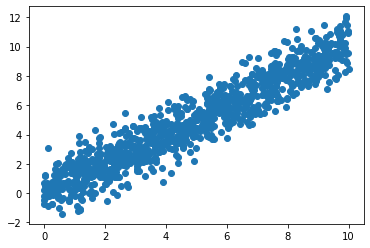

In [ ]:
plt.scatter(x, y_w)

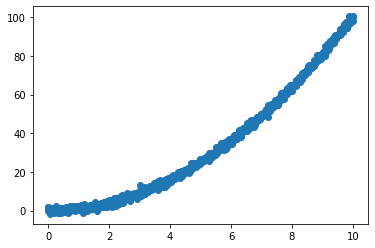

In [ ]:
plt.scatter(x, y_m)

In [ ]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
np.random.seed(1)

n = 20

x_min = -10
x_max = 10
step_size = (x_max - x_min) / n

## pick some x-values and compute true log PDF
x_data = np.arange(x_min, x_max, step_size)
known_log_pdfs = stats.norm.logpdf(x_data, 0, 3)

def gaussian(params):
    mean = params[0]   
    sd = params[1]

    estimated_log_pdfs = stats.norm.logpdf(x_data, loc=mean, scale=sd)
    
    mse = ((estimated_log_pdfs - known_log_pdfs) ** 2).mean()

    return mse

initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')
print(results.x)

# 2. Misspecified

In [ ]:
x = np.random.uniform(0, 10, 100)
y = np.random.normal(loc = x**2, scale = 1, size = 100)

In [ ]:
# true distribution
x = np.random.uniform(0, 10, 100)
y = np.random.normal(loc = x**2, scale = 1, size = 100)
data = zip(x,y)

# model
# cost function f - d is (x,y) form which infers theta from theta'x

# App.1
q1 = normal_ass_q(y, p, c, s =0) #q
# App.2
q_cand = np.arange(70, 130)#todo: find a reasonable range acc. to h(x) - possible w.o. knowing its form?
q2 = q_cand[np.argmax([profit(q, y, p, c, s) for q in q_cand])]

print(profit(q1, y, p, c, s), profit(q2, y, p, c, s))

7923.706733393892 7921.710377110255


In [ ]:
y

array([81.00821638,  7.46363481, 67.07899999, 10.27762757, 46.80857753,
       13.61445179, 31.43282306, -0.38138577, 36.45452032, 11.84792799,
       14.24490141, 75.41750267, 43.25110055,  9.92571025, 53.50890524,
       67.60229864, 52.98624118,  8.36818189, 82.18801565,  4.28855869,
        6.67209951,  1.12287726, 22.38946954,  1.98817176, 69.27125738,
       69.79500156, 65.60207576, 23.69693792, -0.49179191, 55.44773425,
       27.45163731, 61.86040024, 43.24023414, 19.26942202, -0.25463114,
       56.48132625,  1.50679404,  4.40559088, 10.88912092, 16.48448307,
       -1.46526715, 62.76023284,  8.28388656, 52.48865539, 77.38241539,
        0.96740124, 87.7149169 , 15.24912338,  6.13130902,  2.23049491,
       85.61308614, 70.14244211,  0.14942568, 25.99254257, 59.66045334,
       11.71617811, 89.28682175, 66.15580421, 99.40822989,  2.50569567,
       77.34113315, 57.80928067,  0.97729621, 88.77469963, 34.26412584,
        8.48642667,  6.64626866, 26.03758165, 41.26752904,  3.48

In [ ]:
q1

69.20776305366276